In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv('../data/HousingPrices-Amsterdam-August-2021.csv')

df.info()
df['Price']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    924 non-null    int64  
 1   Address  924 non-null    object 
 2   Zip      924 non-null    object 
 3   Price    920 non-null    float64
 4   Area     924 non-null    int64  
 5   Room     924 non-null    int64  
 6   Lon      924 non-null    float64
 7   Lat      924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB


0      685000.0
1      475000.0
2      850000.0
3      580000.0
4      720000.0
         ...   
919    750000.0
920    350000.0
921    350000.0
922    599000.0
923    300000.0
Name: Price, Length: 924, dtype: float64

### FIRST PLOT

NOTE: THE PRICES ARE STRONGLY RIGHT-SKEWED, WITH MOST OBSTERVATIONS CLUSTERED AT THE LOWER END AND A SMALL NUMBER OF EXTREME HIGH-PRICE OUTLIERS STRETCHING THE DISTRO SLIGHTLY

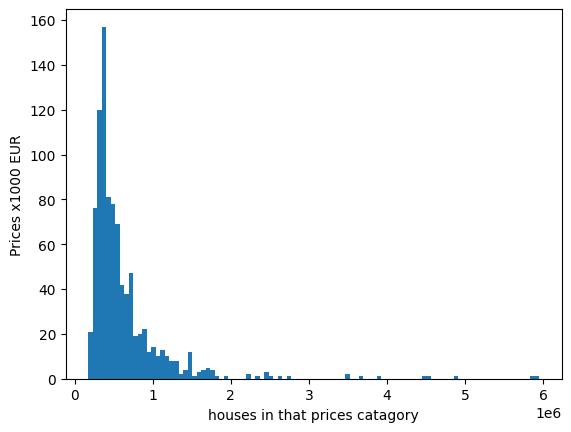

In [9]:
plt.hist(
    df["Price"],
    bins=100,
    
    )
plt.xlabel("houses in that prices catagory")
plt.ylabel("Prices x1000 EUR")
plt.show()

### Price VS Area plot

from this first plot you can see that there is an obvious positive relation in the data, as area goes up, so the price. Also note the variance of the price increases drastically as the area goes up. This means that linear models will underestimate error for big houses in the long term. Additionally, we have a few outliesrs like 400-600m2 this is quite the building for a cheap price likley not realistic but present. In short, with this trend we can assume that the area alone does not explain the pricing, especially on the high-end, meaning that additional features are critical

Text(0.5, 1.0, 'Price vs Area')

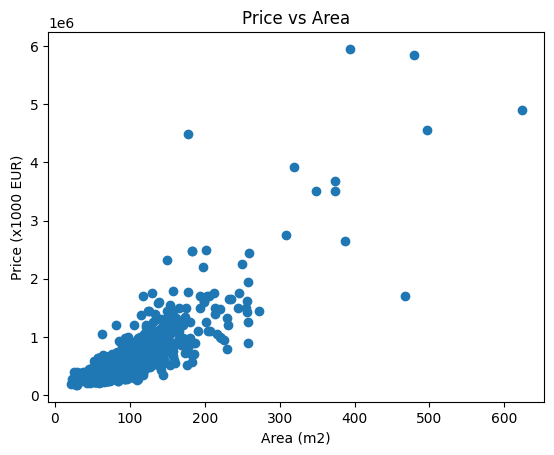

In [4]:
x = df["Area"]
y = df["Price"]
plt.scatter(x,
            y,

            )
plt.xlabel("Area (m2)")
plt.ylabel("Price (x1000 EUR)")
plt.title("Price vs Area")

### AREA VS ROOM BOXPLOT

The area of the housing increases generally with the increase of the number of rooms, this means there is a relationship between the two variables . However there is a strong overlap in area distribuitons across adjacent room counts, this sugggests that rooms is a bad proxy for size rather than an indpenedent predictor. Variance increases slightly with higher room counts, this makes sense as larger homes have more configurations than smaller homes. As final observation to note: There are very few observations with a higher room counts suggesting that the information for that category is less reliable.

<Axes: title={'center': 'Area'}, xlabel='Room'>

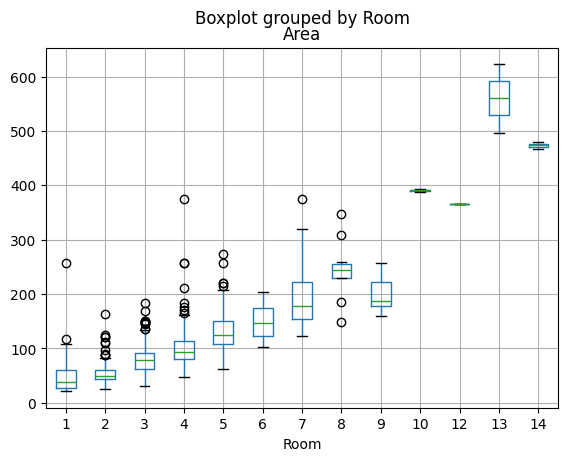

In [5]:
df.boxplot(column="Area", by="Room")